# K-Means

If you have any question regrading this particular assignment feel free to email gibran.muhammad@ui.ac.id

# Table Of Content

* [Unsupervised Learning](#Unsupervised-Learning)
    * [K-Means](#K-Means-Clustering)
        * [Initialize](#Initialize)
        * [Learning](#Learning) (score:3)
        * [Implementation](#Implementation) (score:2)

In [1]:
#put your npm as string below
NPM = "1606882540"

#if someone that also take an ML class this year help you doing this assingment,put his/her NPM as list of string below
COLLABORATORS = []

#if youre using external sources please put its link as list of string below
SOURCES = []

c:\users\alif\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math

In [3]:
def is_similar(X, Y):
    if isinstance(X, list) and isinstance(Y, list):
        if len(X) == len(Y):
            return all([is_similar(x,Y[i]) for i,x in enumerate(X)])
        else:
            return False
    return abs(X-Y) <= 1e-7

# Unsupervised Learning

different with supervised learning, in unsupervised learning we didn't defined an output variable hence we can't used external error criterion that relies on targets or other outside information.

## K-Means Clustering

k-means is a type of clustering model that group the data into k different groups. Because it is an unsupervised model, we didn't specify the target group of the data and just let the machine decided.

Given a data of points, we will use K-Means to group those points into 3 groups

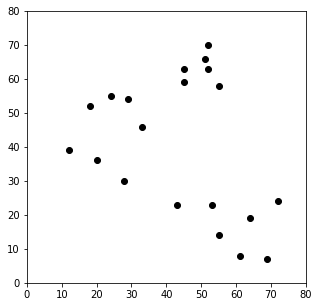

In [4]:
%matplotlib inline

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72,43],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24,23]
})

points = []
for i in range(len(df)):
    points.append((df['x'][i], df['y'][i]))
    
points = np.asarray(points) 
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

### Initialize
First we randomly choose k points as our centroid

In [5]:
def initialize_centroids(X, k, seed=None):
    if(seed):
        np.random.seed(seed)
        
    random_idx = np.random.permutation(X.shape[0])
    centroids = X[random_idx[:k]]
    return centroids

ic = initialize_centroids(points, 3, 200)
ic

array([[28, 30],
       [12, 39],
       [69,  7]], dtype=int64)

### Learning

then we compute the distance between each point to our intial centroids, in our case we will be using euclidean distance as our distance metric. 
<br>
<br>
<b>task: Complete the missing part of code below without importing another library. You can use library that has been imported before such as numpy, pandas or math</b>

notes: <br>
x1 and x2 is an array with the same shape and both represent a point in cartesian coordinate

In [6]:
def euclidean_distance(x1, x2):
    S = 0
    for i in range(len(x1)):
        S += (x1[i]-x2[i])**2
    S = S**(0.5)
    return S

In [7]:
x1 = np.array([1,0])
x2 = np.array([1,2])
S = euclidean_distance(x1,x2)

assert is_similar(S, 2.0)

x1 = np.array([89,23])
x2 = np.array([234,45])
S = euclidean_distance(x1,x2)

assert is_similar(S, 146.6594695203825)


Then we assign each point to its nearest centroid
<br>
<br>
<b>task: Complete the missing part of code below without importing another library. You can use library that has been imported before such as numpy, pandas or math</b>

note: <br>
centroids = an array of points (x,y)

In [8]:
def assign_centroid(centroids, point):
    minimum = 100000; 
    index = -1;
    for i,val in enumerate(centroids):
        distance = euclidean_distance(val,point)
        if distance < minimum:
            minimum = distance
            index = i
    ### return centroid index ex. assign_centroid([[1,2], [32,1], [-34,23]], [1,2]) => 0
    return index;

In [9]:
idx = assign_centroid([[1,2], [32,1], [-34,23]], [1,2])
assert is_similar(idx, 0)

label = []
for point in points:
    label.append(assign_centroid(ic, point))

goal = [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0]
assert is_similar(label, goal)

after that, calculate the mean of each class label then assign those mean as our new centroid
<br>
<br>
<b>task: Complete the missing part of code below without importing another library. You can use library that has been imported before such as numpy, pandas or math</b>

notes: <br>
datas = our dataset <br>
label = list of assigned centroid index associate with datas <br>
old_cetroids = centroids that we want to update

In [10]:
def update_centroids(datas, label, old_centroids):
    new_centroid = np.zeros(old_centroids.shape)
    jumlah_data = np.zeros(old_centroids.shape[0])
    for i,val in enumerate(datas):
        for j,val2 in enumerate(val):
            new_centroid[label[i]][j] += val2 
        jumlah_data[label[i]] += 1

    for i,val in enumerate(new_centroid):
        for j,val2 in enumerate(val):
            new_centroid[i][j] = val2/jumlah_data[i]
            
    return np.round(new_centroid, 3)

In [11]:
lbl = [0,0,0]
X = np.array([[1,0], [5,2], [1,-1]])
c = np.array([[2,2]])
c = update_centroids(X,lbl, c)

goals = np.array([[2.333, 0.333]])
np.testing.assert_allclose(c, goals, rtol=1e-5, atol=0)

lbl = [0,0,0,1,1,1]
X = np.array([[1,0], [5,2], [1,-1], [1,1], [2,2], [5,-2]])
c = np.array([[2,2],[3,2]])
c = update_centroids(X,lbl, c)

goals = np.array([[2.333, 0.333],
       [2.667, 0.333]])
np.testing.assert_allclose(c, goals, rtol=1e-5, atol=0)

ic = initialize_centroids(points, 3, 200)
ic = update_centroids(points, label, ic)
goals = np.array([[44.889, 53.111],
       [20.6  , 47.2  ],
       [62.333, 15.833]])

np.testing.assert_allclose(ic, goals, rtol=1e-5, atol=0)

Then we repeat the learning process until centroids stop moving or new centroids == old centroids.

### Implementation

Lets wrap all of the method we write into one class. Below is the implementation of our K-means class.
<br>
<b>task: Complete the missing part of code below without importing another library. You can use library that has been imported before such as numpy, pandas or math</b>

In [12]:
class Kmeans:
    def __init__(self, n_clusters, max_iter=100, random_state=123, seed=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.seed = seed
        
    def initialize_centroids(self, X):
        if(self.seed):
            np.random.seed(self.seed)
        else:
            np.random.RandomState(self.random_state)

        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids
    
    def euclidean_distance(self, x1, x2):
        S = 0
        for i in range(len(x1)):
            S += (x1[i]-x2[i])**2
        S = S**(0.5)
        return S
    
    def assign_centroid(self, x):
        minimum = 100000; 
        index = -1; 
        # YOUR CODE HERE
        for i,val in enumerate(self.centroids):
            distance = self.euclidean_distance(val,x)
            if distance < minimum:
                minimum = distance
                index = i
        return index
    
    def update_centroids(self, datas, label, old_centroids):
        new_centroid = np.zeros(old_centroids.shape)
        # YOUR CODE HERE
        jumlah_data = np.zeros(old_centroids.shape[0])
        for i,val in enumerate(datas):
            for j,val2 in enumerate(val):
                new_centroid[label[i]][j] += val2 
            jumlah_data[label[i]] += 1

        for i,val in enumerate(new_centroid):
            for j,val2 in enumerate(val):
                if(jumlah_data[i] > 0):
                    new_centroid[i][j] = val2/jumlah_data[i]
        return np.round(new_centroid, 3)
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        self.labels = [0]*X.shape[0]
        for i in range(self.max_iter):
            # YOUR CODE HERE
            for j,point in enumerate(X):
                idx = self.assign_centroid(point)
                self.labels[j] = idx
            self.centroids = self.update_centroids(X,self.labels,self.centroids)
            
    
    def predict(self, X):
        label = []
        # YOUR CODE HERE
        for point in X:
            idx = self.assign_centroid(point)
            label.append(idx)
        return label

In [13]:
kmeans = Kmeans(3, seed=200)
kmeans.fit(points)

assert len(set(kmeans.labels[:7])) == 1
assert len(set(kmeans.labels[7:13])) == 1
assert len(set(kmeans.labels[13:])) == 1

X_test = np.array([[60,80], [50, 10], [10,70]])
y_pred = kmeans.predict(X_test)

assert is_similar(y_pred, [0, 2, 1])


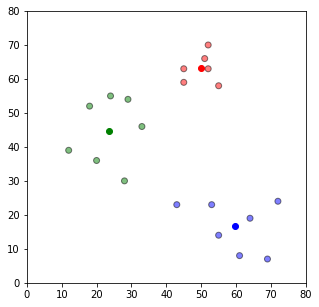

In [14]:
# PLAYGROUND
# you can do anything here as long as not adding any new import or breaking stuff

kmeans = Kmeans(3, seed=200)
kmeans.fit(points)
kmeans.labels

recolor = {0:'r', 1:'g', 2:'b'}

df['colors'] = kmeans.labels
df = df.replace(recolor)

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['colors'], alpha=0.5, edgecolor='k')
for i in range(len(kmeans.centroids)):
    plt.scatter(*kmeans.centroids[i], color=recolor[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

## OPTIONAL (NO SCORE)

In [15]:
# give us your feedback of your experience on taking this test here
FEEDBACK = ""

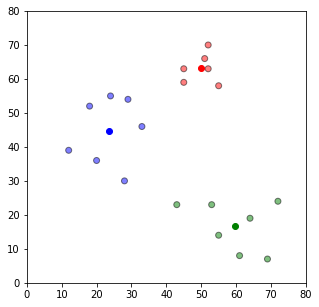

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(points)
recolor = {0:'r', 1:'g', 2:'b'}

df['colors'] = kmeans.labels_
df = df.replace(recolor)

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['colors'], alpha=0.5, edgecolor='k')
for i in range(len(kmeans.cluster_centers_)):
    plt.scatter(*kmeans.cluster_centers_[i], color=recolor[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()